In [87]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',20)
sns.set(font_scale = 1.15)
sns.set_style('whitegrid')

%matplotlib inline

In [8]:
zf = zipfile.ZipFile(r'C:\Users\chopp\Credit-Scoring-Online-Course-main\Credit-Scoring-Online-Course-main\credit_scoring_dataset.zip')
df = pd.read_csv(zf.open('credit_scoring_dataset.csv'),index_col = 'customer_id')

print(df.shape)
df.head()

(32581, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [46]:
data_age = df[['loan_status','person_age']]
data_age

,loan_status,person_age
customer_id,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,1,22
49d00b80-f7ec-41ec-8063-8cc32f384268,0,21
25172c7f-160a-44ac-b271-5833b7a679f6,1,25
a8f721ac-9696-48b3-ae35-bc8b13592d26,1,23
53be6c0c-0a33-41c1-a8d0-e9784b077f98,1,24
...,...,...
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,0,57
ece9693f-16c5-416b-bfa7-34eae7bdc4b3,0,54
1fcb6014-9aad-45be-ac2a-490cfc55c0e4,1,65


In [47]:
from os.path import join
data_age['bin_person_age'] = pd.qcut(data_age['person_age'].astype(float),q=5,duplicates='drop',precision=0)
data_age = data_age.drop('person_age',axis=1)
data_age = data_age.groupby('bin_person_age').agg({'loan_status':['count','sum']})
data_age.columns = data_age.columns.map('_'.join)
data_age

C:\Users\chopp\AppData\Local\Temp\ipykernel_3996\2235749822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['bin_person_age'] = pd.qcut(data_age['person_age'].astype(float),q=5,duplicates='drop',precision=0)


,loan_status_count,loan_status_sum
bin_person_age,,
"(19.0, 23.0]",8766,2092
"(23.0, 25.0]",6586,1444
"(25.0, 27.0]",4615,961
"(27.0, 32.0]",6963,1445
"(32.0, 144.0]",5651,1167


In [54]:
data_age['dist'] = data_age['loan_status_count']/data_age['loan_status_count'].sum()
data_age['bad_rate'] = data_age['loan_status_sum']/data_age['loan_status_count']
data_age = data_age.reset_index()
data_age

,bin_person_age,loan_status_count,loan_status_sum,dist,bad_rate
0,"(19.0, 23.0]",8766,2092,0.269053,0.238649
1,"(23.0, 25.0]",6586,1444,0.202142,0.219253
2,"(25.0, 27.0]",4615,961,0.141647,0.208234
3,"(27.0, 32.0]",6963,1445,0.213714,0.207525
4,"(32.0, 144.0]",5651,1167,0.173445,0.206512


C:\Users\chopp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


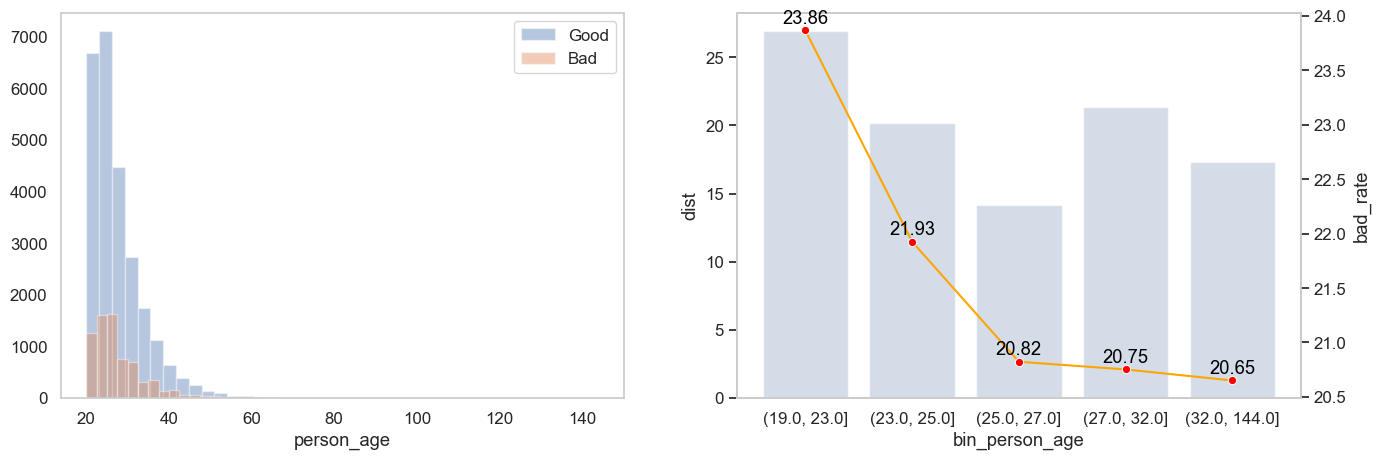

In [66]:
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
fix,ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(df[df['loan_status']==0]['person_age'],kde=False,bins=40,color='C0',label='Good',ax=ax[0])
sns.distplot(df[df['loan_status']==1]['person_age'],kde=False,bins=20,color='C1',label='Bad',ax=ax[0])

sns.barplot(data=data_age,x=data_age['bin_person_age'],y=data_age['dist']*100,color='lightsteelblue',alpha=0.6,ax=ax[1])
ax2=ax[1].twinx()
ax2 = sns.lineplot(data=data_age,x=data_age.index,y=data_age['bad_rate']*100,marker='o',markerfacecolor='red'\
                  ,markersize=6,color='orange')

for x,y in zip(data_age.index,data_age['bad_rate']*100):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,5),ha='center',color='black')

ax[0].legend()
ax[0].grid(False)
ax[1].grid(False)
ax2.grid(False)


C:\Users\chopp\AppData\Local\Temp\ipykernel_3996\4159230950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group['bin_'+i] = pd.qcut(df_plot[i].astype(float),q=5,duplicates='drop',precision=0)
C:\Users\chopp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


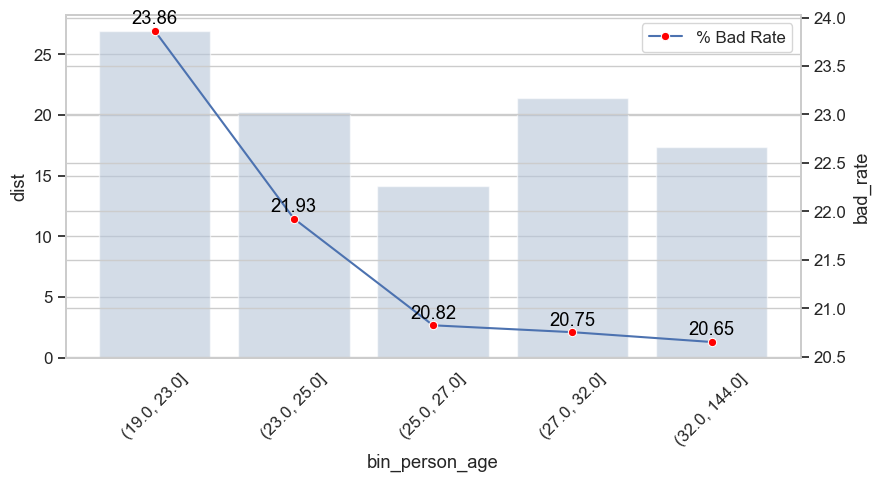

C:\Users\chopp\AppData\Local\Temp\ipykernel_3996\4159230950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group['bin_'+i] = pd.qcut(df_plot[i].astype(float),q=5,duplicates='drop',precision=0)
C:\Users\chopp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


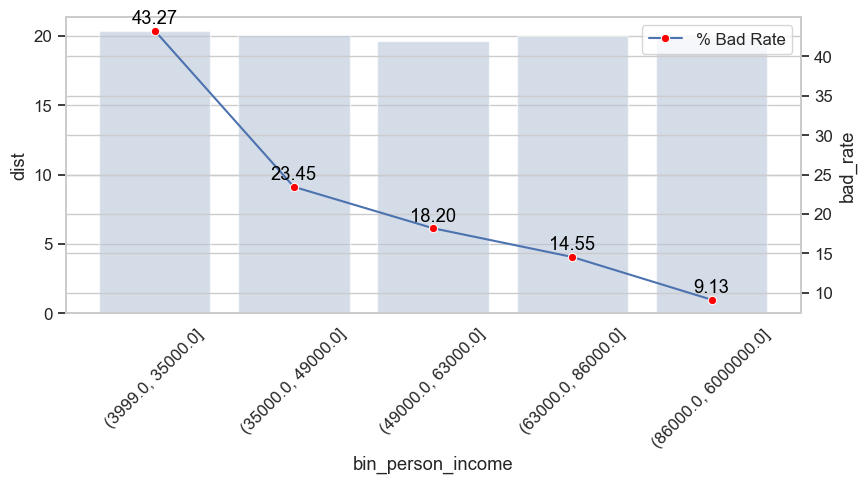

C:\Users\chopp\AppData\Local\Temp\ipykernel_3996\4159230950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group['bin_'+i] = pd.qcut(df_plot[i].astype(float),q=5,duplicates='drop',precision=0)
C:\Users\chopp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


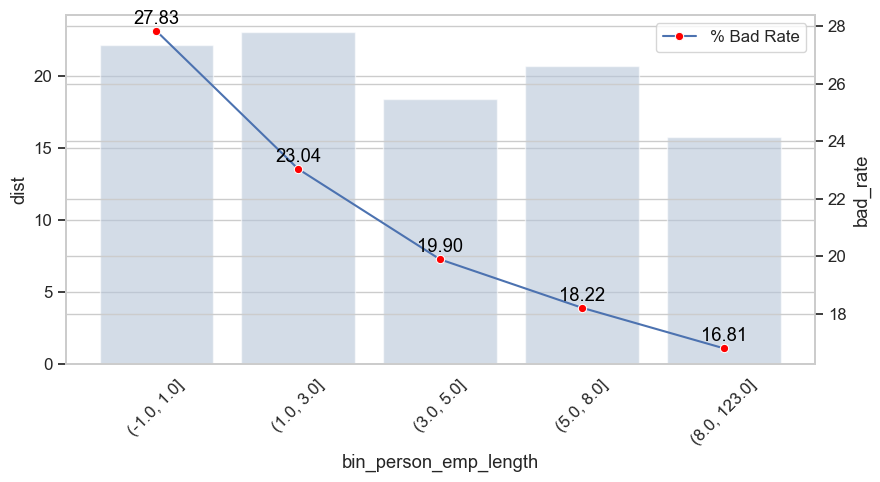

C:\Users\chopp\AppData\Local\Temp\ipykernel_3996\4159230950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group['bin_'+i] = pd.qcut(df_plot[i].astype(float),q=5,duplicates='drop',precision=0)
C:\Users\chopp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


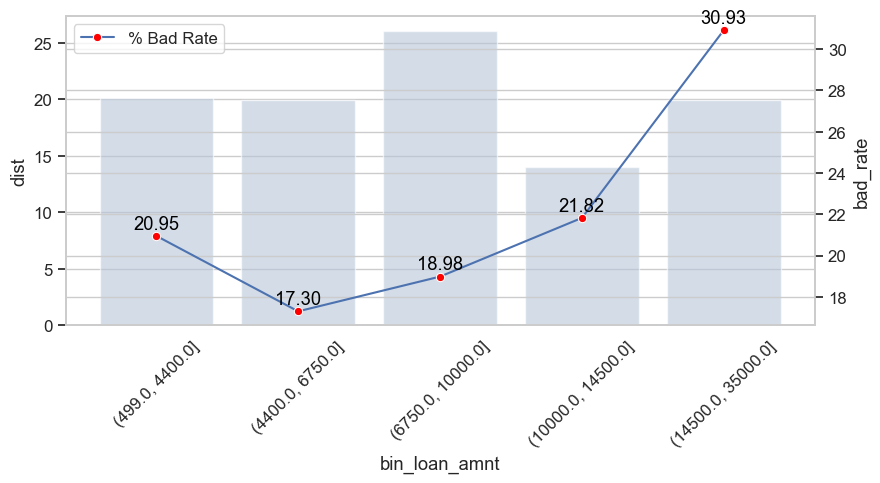

C:\Users\chopp\AppData\Local\Temp\ipykernel_3996\4159230950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group['bin_'+i] = pd.qcut(df_plot[i].astype(float),q=5,duplicates='drop',precision=0)
C:\Users\chopp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


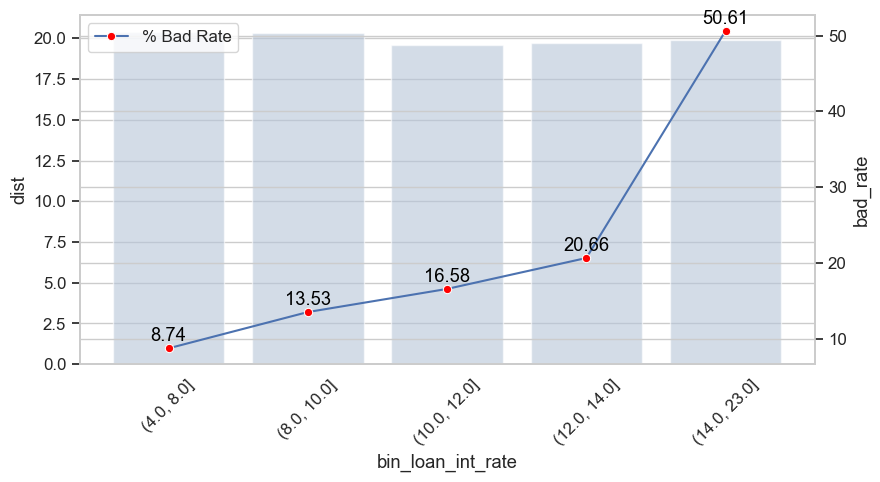

C:\Users\chopp\AppData\Local\Temp\ipykernel_3996\4159230950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group['bin_'+i] = pd.qcut(df_plot[i].astype(float),q=5,duplicates='drop',precision=0)
C:\Users\chopp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


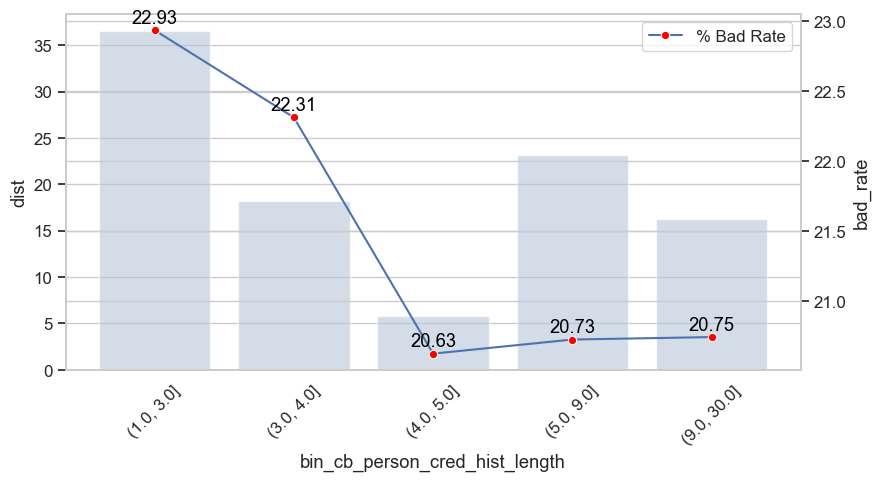

In [88]:
df_plot = df.copy()

for i in df_plot._get_numeric_data().columns:
    if i == 'loan_status':
        pass
    else:
        data_group = df_plot[['loan_status',i]]
        data_group['bin_'+i] = pd.qcut(df_plot[i].astype(float),q=5,duplicates='drop',precision=0)
        data_group = data_group.groupby('bin_'+i).agg({'loan_status':['count','sum']})
        data_group.columns = data_group.columns.map('_'.join)
        data_group['dist'] = data_group['loan_status_count']/data_group['loan_status_count'].sum()
        data_group['bad_rate'] = data_group['loan_status_sum']/data_group['loan_status_count']
        data_group = data_group.reset_index()
        
        
        sns.set(font_scale = 1.1)
        sns.set_style('whitegrid')
        fix,ax = plt.subplots(1,1,figsize=(9,5))
        plt.tick_params(axis='x',rotation = 45)
        sns.barplot(data=data_group,x=data_group['bin_'+i].astype(str),y=data_group['dist']*100,color='lightsteelblue'\
                    ,alpha=0.6,ax=ax)
        ax2 = ax.twinx()
        ax2 = sns.lineplot(data_group.index,data_group['bad_rate']*100,marker='o',markerfacecolor = 'red',label='% Bad Rate')
        
        for x,y in zip(data_group.index,data_group['bad_rate']*100):
            label = "{:.2f}".format(y)
            plt.annotate(label,(x,y),textcoords="offset points", xytext=(0,5), ha='center', color='black')
        plt.tight_layout()
        plt.show()